In [29]:
#perceptron
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
train_data = pd.read_csv('train-perceptron.txt', sep=" ", header=None) 
train_data.columns = ["x1", "y1", "class"] 

In [4]:
train_data

,x1,y1,class
0,1,1.0,1
1,1,-1.0,1
2,2,2.5,2
3,0,2.0,2
4,2,3.0,2
5,4,5.0,1


In [42]:
train_mat=train_data.to_numpy()
w_class_1=[]
w_class_2=[]
w_class_1_x=[]
w_class_1_y=[]
w_class_2_x=[]
w_class_2_y=[]
for i in range(6):
  if train_data.at[i,'class']==1:
    w_class_1.append(train_data.at[i,'x1'])
    w_class_1.append(train_data.at[i,'y1'])
    w_class_1_x.append(train_data.at[i,'x1'])
    w_class_1_y.append(train_data.at[i,'y1'])
  else:
    w_class_2.append(train_data.at[i,'x1'])
    w_class_2.append(train_data.at[i,'y1'])
    w_class_2_x.append(train_data.at[i,'x1'])
    w_class_2_y.append(train_data.at[i,'y1'])


In [6]:
w_class_1

[1, 1.0, 1, -1.0, 4, 5.0]

In [7]:
w_class_2

[2, 2.5, 0, 2.0, 2, 3.0]

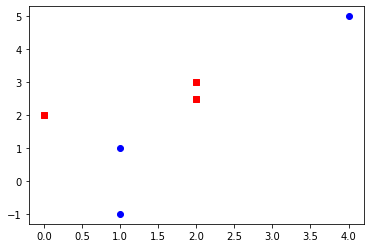

In [43]:
plt.scatter(w_class_1_x,w_class_1_y, color='blue', marker='o')
plt.scatter(w_class_2_x,w_class_2_y, color='red', marker='s')

In [8]:
w_class_1_mat=np.asarray(w_class_1).reshape(3,2)

In [9]:
w_class_1_mat

array([[ 1.,  1.],
       [ 1., -1.],
       [ 4.,  5.]])

In [10]:
w_class_2_mat=np.asarray(w_class_2).reshape(3,2)

In [11]:
w_class_2_mat

array([[2. , 2.5],
       [0. , 2. ],
       [2. , 3. ]])

In [12]:
phi_class_1=[]
for i in range (3):
    phi_class_1.append(w_class_1_mat[i,0]*w_class_1_mat[i,0])
    phi_class_1.append(w_class_1_mat[i,1]*w_class_1_mat[i,1])
    phi_class_1.append(w_class_1_mat[i,0]*w_class_1_mat[i,1])
    phi_class_1.append(w_class_1_mat[i,0])
    phi_class_1.append(w_class_1_mat[i,1])
    phi_class_1.append(1)

In [13]:
phi_class_1
phi_class_1_mat=np.asarray(phi_class_1).reshape(3,6)

In [14]:
phi_class_2=[]
for i in range (3):
    phi_class_2.append(w_class_2_mat[i,0]*w_class_2_mat[i,0])
    phi_class_2.append(w_class_2_mat[i,1]*w_class_2_mat[i,1])
    phi_class_2.append(w_class_2_mat[i,0]*w_class_2_mat[i,1])
    phi_class_2.append(w_class_2_mat[i,0])
    phi_class_2.append(w_class_2_mat[i,1])
    phi_class_2.append(1)

In [15]:
phi_class_2
phi_class_2_mat=np.asarray(phi_class_2).reshape(3,6)

In [16]:
phi_class_2_mat

array([[4.  , 6.25, 5.  , 2.  , 2.5 , 1.  ],
       [0.  , 4.  , 0.  , 0.  , 2.  , 1.  ],
       [4.  , 9.  , 6.  , 2.  , 3.  , 1.  ]])

In [17]:
phi_class_2_mat=phi_class_2_mat*-1

In [18]:
phi_class_2_mat

array([[-4.  , -6.25, -5.  , -2.  , -2.5 , -1.  ],
       [-0.  , -4.  , -0.  , -0.  , -2.  , -1.  ],
       [-4.  , -9.  , -6.  , -2.  , -3.  , -1.  ]])

In [19]:
input=np.vstack((phi_class_1_mat,phi_class_2_mat))

In [20]:
input

array([[ 1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ],
       [ 1.  ,  1.  , -1.  ,  1.  , -1.  ,  1.  ],
       [16.  , 25.  , 20.  ,  4.  ,  5.  ,  1.  ],
       [-4.  , -6.25, -5.  , -2.  , -2.5 , -1.  ],
       [-0.  , -4.  , -0.  , -0.  , -2.  , -1.  ],
       [-4.  , -9.  , -6.  , -2.  , -3.  , -1.  ]])

In [33]:
#For initial weight of all 1
learning_rate = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])

report = []


for alpha in learning_rate:
    OneIteration = 0
    weight = np.float64(np.array([1, 1, 1, 1, 1, 1]))
  

    while True:
        OneIteration = OneIteration+1
        MissClassifiedOne = False

        for i in range(0, 6):
            g = np.dot(weight, input[i])
            
            if(g<=0):
                weight = weight + np.dot(input[i], alpha)
                MissClassifiedOne = True

        if(MissClassifiedOne == False):
            break
    

    ManyIteration=0
    weight = np.float64(np.array([1, 1, 1, 1, 1, 1]))

    while True:

        temp=np.float64(np.array([0 , 0 , 0 , 0 , 0 , 0]))
        ManyIteration=ManyIteration+1
        MissClassifiedMany=False
        for i in range (0,6):

            g=np.dot(weight,input[i])


            if (g<=0):
                temp+=np.dot(input[i],alpha)
                MissClassifiedMany=True
        weight=weight+temp
        

        if (MissClassifiedMany==False):
            break

    report.append([alpha,OneIteration, ManyIteration])

report=np.array(report)
final = pd.DataFrame({'alpha': report[:, 0], 'One at a time': report[:, 1], 'Many at a time': report[:, 2]})
final

,alpha,One at a time,Many at a time
0,0.1,6.0,102.0
1,0.2,92.0,104.0
2,0.3,104.0,91.0
3,0.4,106.0,116.0
4,0.5,93.0,105.0
5,0.6,93.0,114.0
6,0.7,108.0,91.0
7,0.8,115.0,91.0
8,0.9,94.0,105.0
9,1.0,94.0,93.0


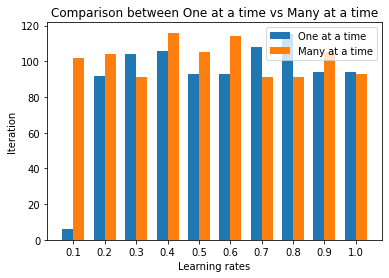

In [34]:
width = 0.035
fig,ax = plt.subplots()
ax.bar(learning_rate - width/2, final['One at a time'], width=0.035, label='One at a time')

ax.bar(learning_rate + width/2, final['Many at a time'], width=0.035, label='Many at a time')

ax.set_ylabel('Iteration')
ax.set_xlabel('Learning rates')
ax.set_title('Comparison between One at a time vs Many at a time')
ax.set_xticks(learning_rate)
ax.legend()
plt.show()

In [35]:
#For initial weight of all 0
learning_rate = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])

report = []


for alpha in learning_rate:
    OneIteration = 0
    weight = np.float64(np.array([0, 0, 0, 0, 0, 0]))
  

    while True:
        OneIteration = OneIteration+1
        MissClassifiedOne = False

        for i in range(0, 6):
            g = np.dot(weight, input[i])
            
            if(g<=0):
                weight = weight + np.dot(input[i], alpha)
                MissClassifiedOne = True

        if(MissClassifiedOne == False):
            break
    

    ManyIteration=0
    weight = np.float64(np.array([0, 0, 0, 0, 0, 0]))

    while True:

        temp=np.float64(np.array([0 , 0 , 0 , 0 , 0 , 0]))
        ManyIteration=ManyIteration+1
        MissClassifiedMany=False
        for i in range (0,6):

            g=np.dot(weight,input[i])


            if (g<=0):
                temp+=np.dot(input[i],alpha)
                MissClassifiedMany=True
        weight=weight+temp
        

        if (MissClassifiedMany==False):
            break

    report.append([alpha,OneIteration, ManyIteration])

report=np.array(report)
final = pd.DataFrame({'alpha': report[:, 0], 'One at a time': report[:, 1], 'Many at a time': report[:, 2]})
final

,alpha,One at a time,Many at a time
0,0.1,94.0,105.0
1,0.2,94.0,105.0
2,0.3,94.0,92.0
3,0.4,94.0,105.0
4,0.5,94.0,92.0
5,0.6,94.0,92.0
6,0.7,94.0,92.0
7,0.8,94.0,105.0
8,0.9,94.0,105.0
9,1.0,94.0,92.0


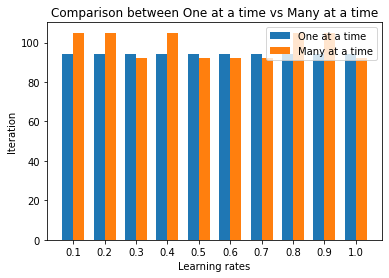

In [36]:
width = 0.035
fig,ax = plt.subplots()
ax.bar(learning_rate - width/2, final['One at a time'], width=0.035, label='One at a time')

ax.bar(learning_rate + width/2, final['Many at a time'], width=0.035, label='Many at a time')

ax.set_ylabel('Iteration')
ax.set_xlabel('Learning rates')
ax.set_title('Comparison between One at a time vs Many at a time')
ax.set_xticks(learning_rate)
ax.legend()
plt.show()

In [37]:
import random 
  
random.seed(3) 
  


a=(random.randint(1, 10))
b=(random.randint(1, 10))
c=(random.randint(1, 10))
d=(random.randint(1, 10))
e=(random.randint(1, 10))
f=(random.randint(1, 10))

In [38]:
print(a,b,c,d,e,f)

4 10 9 3 6 10


In [39]:
#For initial weight of all random seed
learning_rate = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])

report = []


for alpha in learning_rate:
    OneIteration = 0
    weight = np.float64(np.array([a, b, c, d, e, f]))
  

    while True:
        OneIteration = OneIteration+1
        MissClassifiedOne = False

        for i in range(0, 6):
            g = np.dot(weight, input[i])
            
            if(g<=0):
                weight = weight + np.dot(input[i], alpha)
                MissClassifiedOne = True

        if(MissClassifiedOne == False):
            break
    

    ManyIteration=0
    weight = np.float64(np.array([a, b, c, d, e, f]))

    while True:

        temp=np.float64(np.array([0 , 0 , 0 , 0 , 0 , 0]))
        ManyIteration=ManyIteration+1
        MissClassifiedMany=False
        for i in range (0,6):

            g=np.dot(weight,input[i])


            if (g<=0):
                temp+=np.dot(input[i],alpha)
                MissClassifiedMany=True
        weight=weight+temp
        

        if (MissClassifiedMany==False):
            break

    report.append([alpha,OneIteration, ManyIteration])

report=np.array(report)
final = pd.DataFrame({'alpha': report[:, 0], 'One at a time': report[:, 1], 'Many at a time': report[:, 2]})
final

,alpha,One at a time,Many at a time
0,0.1,33.0,48.0
1,0.2,21.0,93.0
2,0.3,89.0,107.0
3,0.4,10.0,13.0
4,0.5,80.0,10.0
5,0.6,8.0,81.0
6,0.7,100.0,89.0
7,0.8,93.0,132.0
8,0.9,97.0,7.0
9,1.0,98.0,99.0


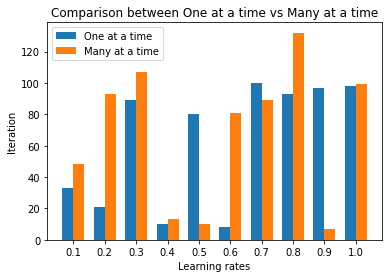

In [40]:
width = 0.035
fig,ax = plt.subplots()
ax.bar(learning_rate - width/2, final['One at a time'], width=0.035, label='One at a time')

ax.bar(learning_rate + width/2, final['Many at a time'], width=0.035, label='Many at a time')

ax.set_ylabel('Iteration')
ax.set_xlabel('Learning rates')
ax.set_title('Comparison between One at a time vs Many at a time')
ax.set_xticks(learning_rate)
ax.legend()
plt.show()